## Initialization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
import numpy as np
import pandas as pd
import seaborn as sns
import keras.utils
import keras.backend as K
from keras import optimizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import utils as np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers.advanced_activations import LeakyReLU

sns.set_style('whitegrid')

## Data Preprocessing

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])

Train size: 60000
Test size: 10000


## Custom function for Recall, Precision, F1 and Plot_fig w.r.t Datasets

In [3]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img/'+str(i)+'-accuracy.jpg')
    plt.close(fig)

## Model Initialization

In [4]:
import tensorflow as tf

nin = 784 # 28*28 Pixels 
nh  = 512
nout = 10
epochs = 100 
batch_size = 128

def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(nin, )),
    tf.keras.layers.Dense(nh, activation=activation),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(nout, activation='softmax')
  ])

In [ ]:
## Testing best AF w.r.t the Datasets without Grid Search

Epoch 1/100
469/469 [==============================] - 6s 10ms/step - loss: 0.7848 - accuracy: 0.8196 - f1_m: 0.8198 - precision_m: 0.8320 - recall_m: 0.8082 - val_loss: 0.5603 - val_accuracy: 0.8710 - val_f1_m: 0.8725 - val_precision_m: 0.8796 - val_recall_m: 0.8655
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 0.6532 - accuracy: 0.8627 - f1_m: 0.8644 - precision_m: 0.8707 - recall_m: 0.8582 - val_loss: 0.6364 - val_accuracy: 0.8854 - val_f1_m: 0.8848 - val_precision_m: 0.8900 - val_recall_m: 0.8796
Epoch 3/100
469/469 [==============================] - 5s 11ms/step - loss: 0.7746 - accuracy: 0.8597 - f1_m: 0.8608 - precision_m: 0.8660 - recall_m: 0.8557 - val_loss: 0.6788 - val_accuracy: 0.8791 - val_f1_m: 0.8811 - val_precision_m: 0.8847 - val_recall_m: 0.8775
Epoch 4/100
469/469 [==============================] - 5s 11ms/step - loss: 0.7515 - accuracy: 0.8659 - f1_m: 0.8670 - precision_m: 0.8709 - recall_m: 0.8631 - val_loss: 0.7006 - val_accuracy: 0.8

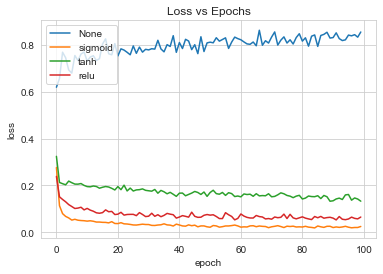

In [6]:
# fit  model using Adam optimizer
for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model = create_model()
    opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy',f1_m,precision_m, recall_m])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    plt.plot(history.history['loss'])
loss_4, accuracy_4, f1_score_4, precision_4, recall_4 = model.evaluate(x_test, y_test, verbose=0)

plt.title('Loss vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')

Epoch 1/100
469/469 [==============================] - 7s 13ms/step - loss: 0.5262 - accuracy: 0.8511 - f1_m: 0.8446 - precision_m: 0.8937 - recall_m: 0.8104 - val_loss: 0.1160 - val_accuracy: 0.9645 - val_f1_m: 0.9653 - val_precision_m: 0.9707 - val_recall_m: 0.9599
Epoch 2/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1143 - accuracy: 0.9644 - f1_m: 0.9653 - precision_m: 0.9713 - recall_m: 0.9593 - val_loss: 0.0919 - val_accuracy: 0.9701 - val_f1_m: 0.9712 - val_precision_m: 0.9745 - val_recall_m: 0.9680
Epoch 3/100
469/469 [==============================] - 5s 11ms/step - loss: 0.0783 - accuracy: 0.9761 - f1_m: 0.9764 - precision_m: 0.9797 - recall_m: 0.9731 - val_loss: 0.0835 - val_accuracy: 0.9738 - val_f1_m: 0.9741 - val_precision_m: 0.9771 - val_recall_m: 0.9712
Epoch 4/100
469/469 [==============================] - 5s 11ms/step - loss: 0.0647 - accuracy: 0.9801 - f1_m: 0.9807 - precision_m: 0.9831 - recall_m: 0.9783 - val_loss: 0.0812 - val_accuracy: 0.9

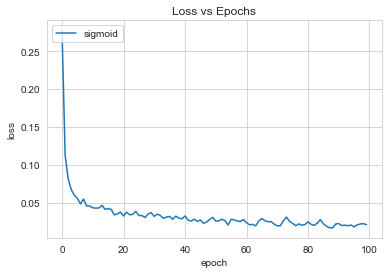

In [11]:
# fit model using Adam optimizer
# Best activation - sigmoid 
for activation in ['sigmoid']:
    model = create_model()
    opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy',f1_m,precision_m, recall_m])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    plt.plot(history.history['loss'])
loss_4, accuracy_4, f1_score_4, precision_4, recall_4 = model.evaluate(x_test, y_test, verbose=0)

plt.title('Loss vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sigmoid'], loc='upper left')

## Final parameter values for Layers in the Models

In [7]:
import json
layer_ = 1
model = create_model()
print("Initial Parameters")
print("----------"*3)
for layer in model.layers:
    g=layer.get_config()
    print('Layer: {}'.format(layer_))
    print("----------"*3)
    print (json.dumps(g, indent=2, default=str))
    layer_ += 1
    print("----------"*3)

Initial Parameters
------------------------------
Layer: 1
------------------------------
{
  "name": "flatten_5",
  "trainable": true,
  "batch_input_shape": [
    null,
    784
  ],
  "dtype": "float32",
  "data_format": "channels_last"
}
------------------------------
Layer: 2
------------------------------
{
  "name": "dense_10",
  "trainable": true,
  "dtype": "float32",
  "units": 512,
  "activation": "relu",
  "use_bias": true,
  "kernel_initializer": {
    "class_name": "GlorotUniform",
    "config": {
      "seed": null
    }
  },
  "bias_initializer": {
    "class_name": "Zeros",
    "config": {}
  },
  "kernel_regularizer": null,
  "bias_regularizer": null,
  "activity_regularizer": null,
  "kernel_constraint": null,
  "bias_constraint": null
}
------------------------------
Layer: 3
------------------------------
{
  "name": "dropout_5",
  "trainable": true,
  "dtype": "float32",
  "rate": 0.2,
  "noise_shape": null,
  "seed": null
}
------------------------------
Layer: 4


<class 'list'>


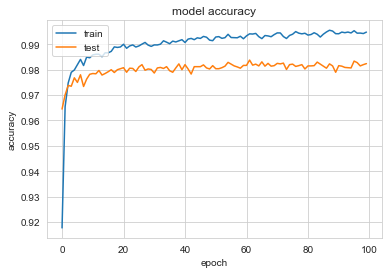

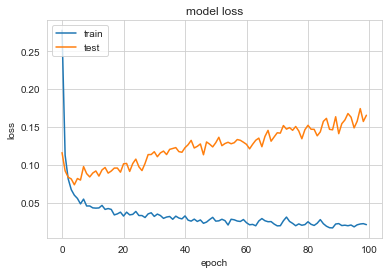

In [12]:
print(type(history.history['accuracy']))
sns.set_style('whitegrid')
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
f1_score_4

0.9823741912841797

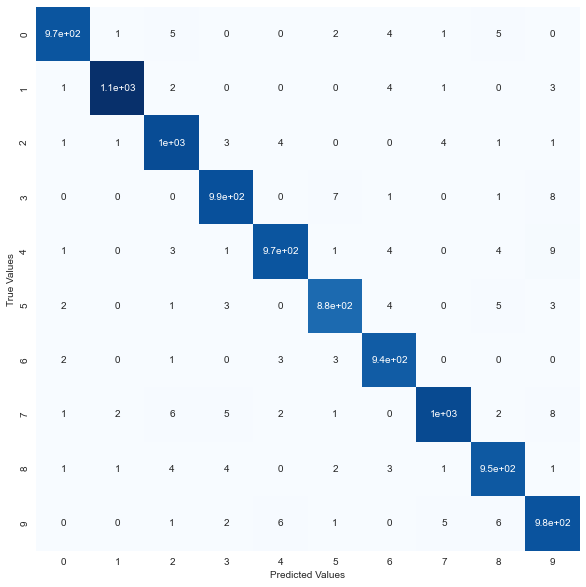

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(x_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

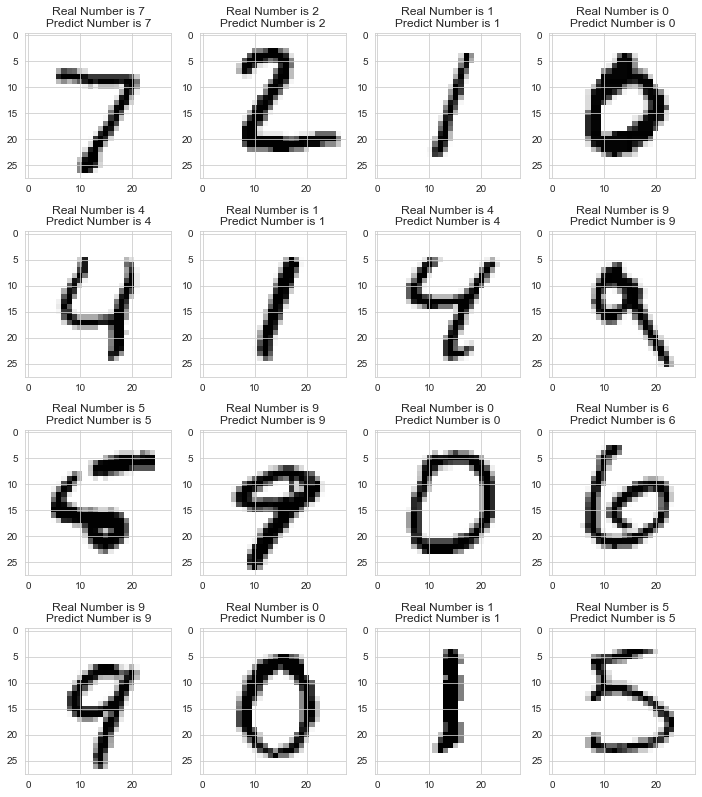

In [14]:
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [16]:
f1_score_4

0.9823741912841797

## Save the model and its weights with custom function for future usage

In [19]:
model.save(r"C:\Users\User\Downloads\mnist.h5")
model.save_weights(r"C:\Users\User\Downloads\mnist_weights")
model.load_weights(r"C:\Users\User\Downloads\mnist.h5")

# Recreate the exact same model, including its weights and the optimizer
dependencies = {
    'f1_m': f1_m,
    'precision_m':precision_m,
    'recall_m':recall_m,
}
model.load_weights(r"C:\Users\User\Downloads\mnist_weights")
new_model = tf.keras.models.load_model(r"C:\Users\User\Downloads\mnist.h5", custom_objects=dependencies)
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', f1_m, precision_m, recall_m])
# Show the model architecture
new_model.summary()

loss_4, accuracy_4, f1_score_4, precision_4, recall_4 = new_model.evaluate(x_test, y_test, verbose=0)

print("Loss: " + str(loss_4))
print("Accuracy: " + str(accuracy_4))
print("F1 Score: " + str(f1_score_4))
print("Precision: " + str(precision_4))
print("Recall: " + str(recall_4))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Loss: 0.16548849642276764
Accuracy: 0.9824000000953674
F1 Score: 0.9823741912841797
Precision: 0.9824216961860657
Recall: 0.9823282957077026
